In [1]:
# Filtrado de ruido
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

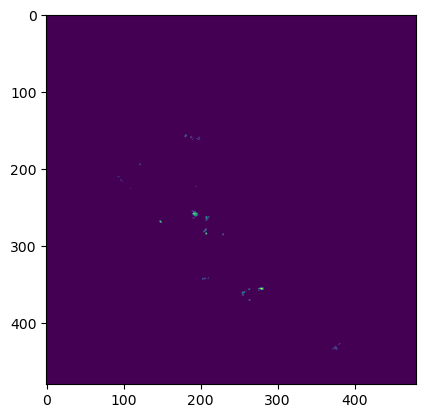

In [2]:
# Lectura de imágenes ruidosas
parent_dir_path = 'D:\\Radar Zaragoza\SoloRuido'
images = {}

# start = 0
# end = 301
i = 0

for filename in os.listdir(parent_dir_path):
#     if (i >= start):
        file_path = os.path.join(parent_dir_path, filename)
        if os.path.isfile(file_path):
            image = (plt.imread(file_path) * 11).round(0)
            images[filename] = image
        
#     if (i >= end):
#         break
#     i = i + 1
    
keys = list(images.keys())
plt.imshow(images[keys[0]])

# Obtención de máscara

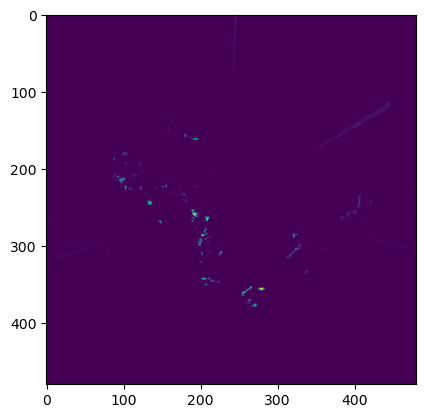

In [3]:
# mean = np.array((list(images.values()))).mean(axis = 0)
aux = np.array((list(images.values())))
aux[aux > 0] = 1.0
mean = aux.mean(axis = 0)
plt.imshow(mean)

In [4]:
mean_val = mean[mean > 0].mean()
print('mean:', mean_val)
print('max', mean.max())
print('min', mean[mean > 0].min())

mean: 0.033530496
max 0.72786885
min 0.0032786885


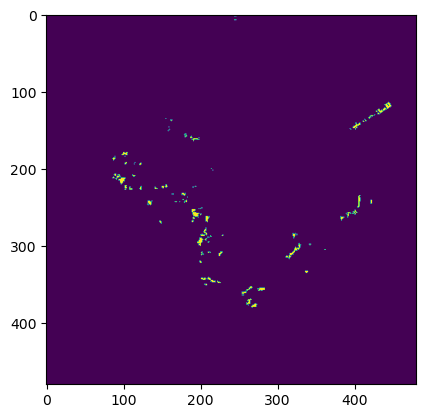

In [5]:
mask = np.zeros(mean.shape)
mask[mean > mean_val] = 1.0
plt.imshow(mask)

In [6]:
# Ampliar máscara engordando la imagen

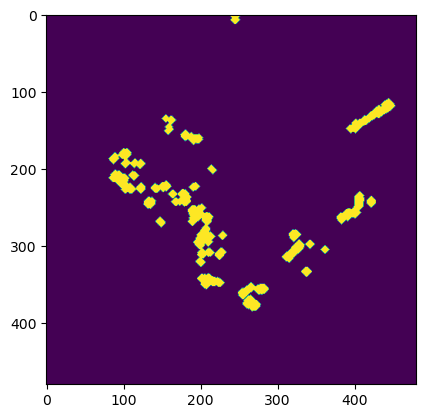

In [7]:
# kernel = np.ones((3, 3), np.uint8)
kernel = np.array([[0.0, 1.0, 0.0], [1.0, 1.0, 1.0], [0.0, 1.0, 0.0]], np.uint8)
mask2 = cv2.dilate(mask, kernel, iterations = 5)
plt.imshow(mask2)

In [8]:
# ventana = 10
# mask2 = mask.copy()
# for i in range(mask.shape[0]):
#     for j in range(mask.shape[1]):
#         b = False
#         for ii in range(max(i-ventana, 0), min(i+ventana, mask.shape[0])):
#             for jj in range(max(j-ventana, 0), min(j+ventana, mask.shape[0])):
#                 if (mask[ii,jj] == 1.0 and (abs(i-ii) + abs(j-jj)) <= ventana):
#                     b = True
#                     break
#         if b:
#             mask2[i,j] = 1.0
# plt.imshow(mask2)

In [18]:
def apply_filter(cont):

    if (i >= start):
            file_path = os.path.join(parent_dir_path, filename)
            if os.path.isfile(file_path):
                image = (plt.imread(file_path) * 11).round(0)
    #             images[filename] = image
                image2 = image.copy()
                image2[mask2 == 1.0] = 0
                if (image2.max() == 0): # imagen vacia
                    cont = cont + 1
    #                 cv2.imwrite(os.path.join(new_dir_path, filename), image2 * (255/11))
                if (image2.max() > 0): # imagen no vacia


                    kernel = np.array([[0.0, 1.0, 0.0], [1.0, 1.0, 1.0], [0.0, 1.0, 0.0]], np.uint8)
                    image2[image2 > 0] = 1.0
                    mask3 = cv2.dilate(image2, kernel, iterations = 15)
                    image3 = image.copy()
                    image3[np.logical_and(mask2 == 1.0, mask3 == 0.0)] = 0

                    cv2.imwrite(os.path.join(new_dir_path, filename), image3 * (255/11))
                    image3 = None
                    mask3 = None
            image = None
            image2 = None
    return cont

In [19]:
# Aplicación del filtro
parent_dir_path = 'D:\\Radar Zaragoza\Preprocessed'
new_dir_path = 'D:\\Radar Zaragoza\Filtered'
# images = {}

# start = 10000
# end = start + 500
start = 44000
end = 580271
i = 0
cont = 0

for filename in os.listdir(parent_dir_path):

    cont = apply_filter(cont)



    i = i + 1
    if (i >= end):
        break
    if (i%2000 == 0):
        print(i, 'imágenes filtradas,', cont, 'vacías')

print(i, 'imágenes filtradas,', cont, 'vacías')
# keys = list(images.keys())
# plt.imshow(images[keys[0]])

2000 imágenes filtradas, 0 vacías
4000 imágenes filtradas, 0 vacías
6000 imágenes filtradas, 0 vacías
8000 imágenes filtradas, 0 vacías
10000 imágenes filtradas, 0 vacías
12000 imágenes filtradas, 0 vacías
14000 imágenes filtradas, 0 vacías
16000 imágenes filtradas, 0 vacías
18000 imágenes filtradas, 0 vacías
20000 imágenes filtradas, 0 vacías
22000 imágenes filtradas, 0 vacías
24000 imágenes filtradas, 0 vacías
26000 imágenes filtradas, 0 vacías
28000 imágenes filtradas, 0 vacías
30000 imágenes filtradas, 0 vacías
32000 imágenes filtradas, 0 vacías
34000 imágenes filtradas, 0 vacías
36000 imágenes filtradas, 0 vacías
38000 imágenes filtradas, 0 vacías
40000 imágenes filtradas, 0 vacías
42000 imágenes filtradas, 0 vacías
44000 imágenes filtradas, 0 vacías
46000 imágenes filtradas, 439 vacías
48000 imágenes filtradas, 743 vacías
50000 imágenes filtradas, 1381 vacías
52000 imágenes filtradas, 1811 vacías
54000 imágenes filtradas, 2271 vacías
56000 imágenes filtradas, 2439 vacías
58000 im

KeyboardInterrupt: 